In [3]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('data/patient_dataframe.csv')
df.head()

,patientID,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,Diagnosis,Diagnosis.1,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
0,Z4115614,6,6,6,342.0,0.0,1.0,"{'DQ549', 'DZ001', 'DQ540'}","{'DQ549', 'DZ001', 'DQ540'}",5,0,1,0,6,6,0,0
1,Z4119225,6,3,6,260.0,0.0,1.0,{'DZ001'},{'DZ001'},6,0,0,0,6,6,0,0
2,Z4127033,17,11,17,1547.0,0.0,1.0,"{'DZ135C', 'DZ001', 'DQ753', 'DZ033A', 'DK628'...","{'DZ135C', 'DZ001', 'DQ753', 'DZ033A', 'DK628'...",14,1,2,0,17,17,0,0
3,Z4139519,3,3,3,120.0,0.0,1.0,{'DZ001'},{'DZ001'},3,0,0,0,3,3,0,0
4,Z4146746,4,3,4,180.0,0.0,1.0,{'DZ001'},{'DZ001'},3,1,0,0,4,4,0,0


In [5]:
# drop not numerical columns
df_drop = df.drop(['patientID', 'Diagnosis', 'Diagnosis.1'], axis=1)
df_drop.head()

,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
0,6,6,6,342.0,0.0,1.0,5,0,1,0,6,6,0,0
1,6,3,6,260.0,0.0,1.0,6,0,0,0,6,6,0,0
2,17,11,17,1547.0,0.0,1.0,14,1,2,0,17,17,0,0
3,3,3,3,120.0,0.0,1.0,3,0,0,0,3,3,0,0
4,4,3,4,180.0,0.0,1.0,3,1,0,0,4,4,0,0


In [6]:
# standardize the data
scaler = sk.preprocessing.StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_drop), columns=df_drop.columns)
df_scaled


,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
0,0.065295,0.154826,0.026830,-0.039000,-1.938148,1.073732,0.114552,-0.049641,-0.061644,-0.224827,0.082903,0.086233,-0.008172,-0.304745
1,0.065295,-0.480137,0.026830,-0.156793,-1.938148,1.073732,0.277126,-0.049641,-0.392437,-0.224827,0.082903,0.086233,-0.008172,-0.304745
2,1.472026,1.213096,1.372458,1.691989,-1.938148,1.073732,1.577722,6.411368,0.269149,-0.224827,1.512636,1.508617,-0.008172,-0.304745
3,-0.318359,-0.480137,-0.340159,-0.357904,-1.938148,1.073732,-0.210597,-0.049641,-0.392437,-0.224827,-0.307025,-0.301691,-0.008172,-0.304745
4,-0.190475,-0.480137,-0.217829,-0.271714,-1.938148,1.073732,-0.210597,6.411368,-0.392437,-0.224827,-0.177049,-0.172383,-0.008172,-0.304745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331757,0.193179,0.154826,0.149160,0.389079,-0.377078,-0.931331,0.439701,-0.049641,-0.392437,-0.224827,0.212878,0.215540,-0.008172,-0.304745
331758,-0.062590,-0.056828,-0.095500,-0.116571,-0.809636,-0.931331,0.114552,-0.049641,-0.392437,-0.224827,-0.047073,-0.043075,-0.008172,-0.304745
331759,-0.446244,-0.268483,-0.462489,-0.389507,-0.944740,-0.931331,-0.373172,-0.049641,-0.392437,-0.224827,-0.437001,-0.430998,-0.008172,-0.304745
331760,-0.574129,-0.903445,-0.584819,-0.434039,-0.706322,-0.931331,-0.535746,-0.049641,-0.392437,-0.224827,-0.566976,-0.560306,-0.008172,-0.304745


In [7]:
# pca
pca = sk.decomposition.PCA(n_components=10)
pca.fit(df_scaled)

PCA(n_components=10)

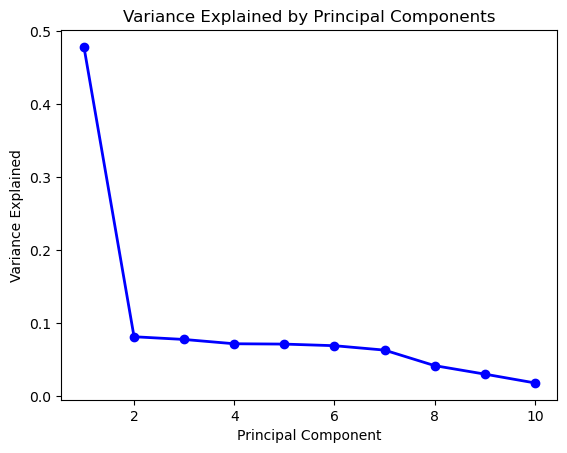

In [8]:
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

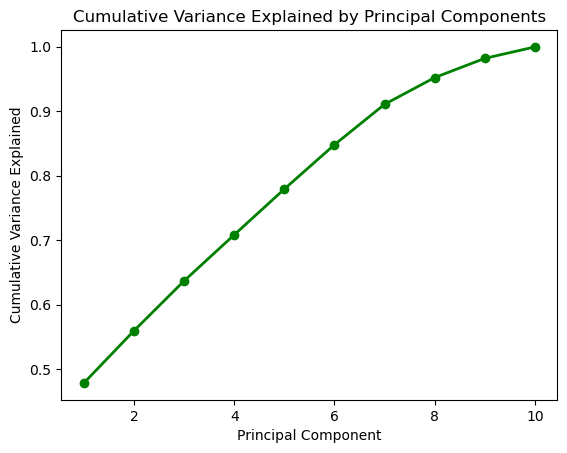

In [9]:
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pc_values, cumulative_variance_explained, 'o-', linewidth=2, color='green')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()


In [10]:
var_explained_7 = np.cumsum(pca.explained_variance_ratio_[0:7])
print(f'First 7 components explain {var_explained_7[-1]:.2f} of the variance')

First 7 components explain 0.91 of the variance


In [11]:
# pca for 7 components
pca = sk.decomposition.PCA(n_components=7)
principal_components = pca.fit_transform(df_scaled)

In [12]:
# pca components
pca_components = pca.components_
pca_components_df = pd.DataFrame(pca_components, columns=df_drop.columns, index=[f'PC{i+1}' for i in range(pca.n_components)])
pca_components_df

,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
PC1,0.382487,0.291072,0.383574,0.333026,0.010188,-0.033454,0.354729,0.024894,0.266312,0.115432,0.380249,0.380138,0.000032,0.099641
PC2,-0.000720,-0.054840,0.029260,0.058631,0.542585,0.373218,-0.021290,-0.101988,0.046679,-0.536143,0.038712,-0.034108,-0.040316,0.504221
PC3,-0.056615,0.200041,-0.006675,-0.049093,0.364019,-0.443258,0.125008,-0.192111,-0.390964,0.443527,-0.090171,-0.086954,0.089937,0.446602
PC4,-0.000121,-0.003675,0.002463,0.002334,0.016837,0.137451,-0.006969,0.181745,0.004562,0.009287,-0.000806,-0.001439,0.973447,0.003046
PC5,-0.017806,0.068423,-0.009706,-0.029238,0.176219,-0.012221,-0.001080,0.952493,-0.092626,0.070927,-0.023315,-0.023979,-0.179401,0.093228
PC6,-0.029546,0.122211,0.020143,0.006156,-0.449330,0.666614,0.101171,-0.022415,-0.281130,0.321391,-0.053673,-0.053824,-0.084061,0.362724
PC7,0.028403,0.047288,-0.023854,-0.090658,0.577408,0.445017,0.063049,-0.098256,-0.049787,0.393656,-0.000094,0.063768,-0.055345,-0.527756


In [13]:
pca_components_df.to_csv('data/pca_components.csv')

In [14]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

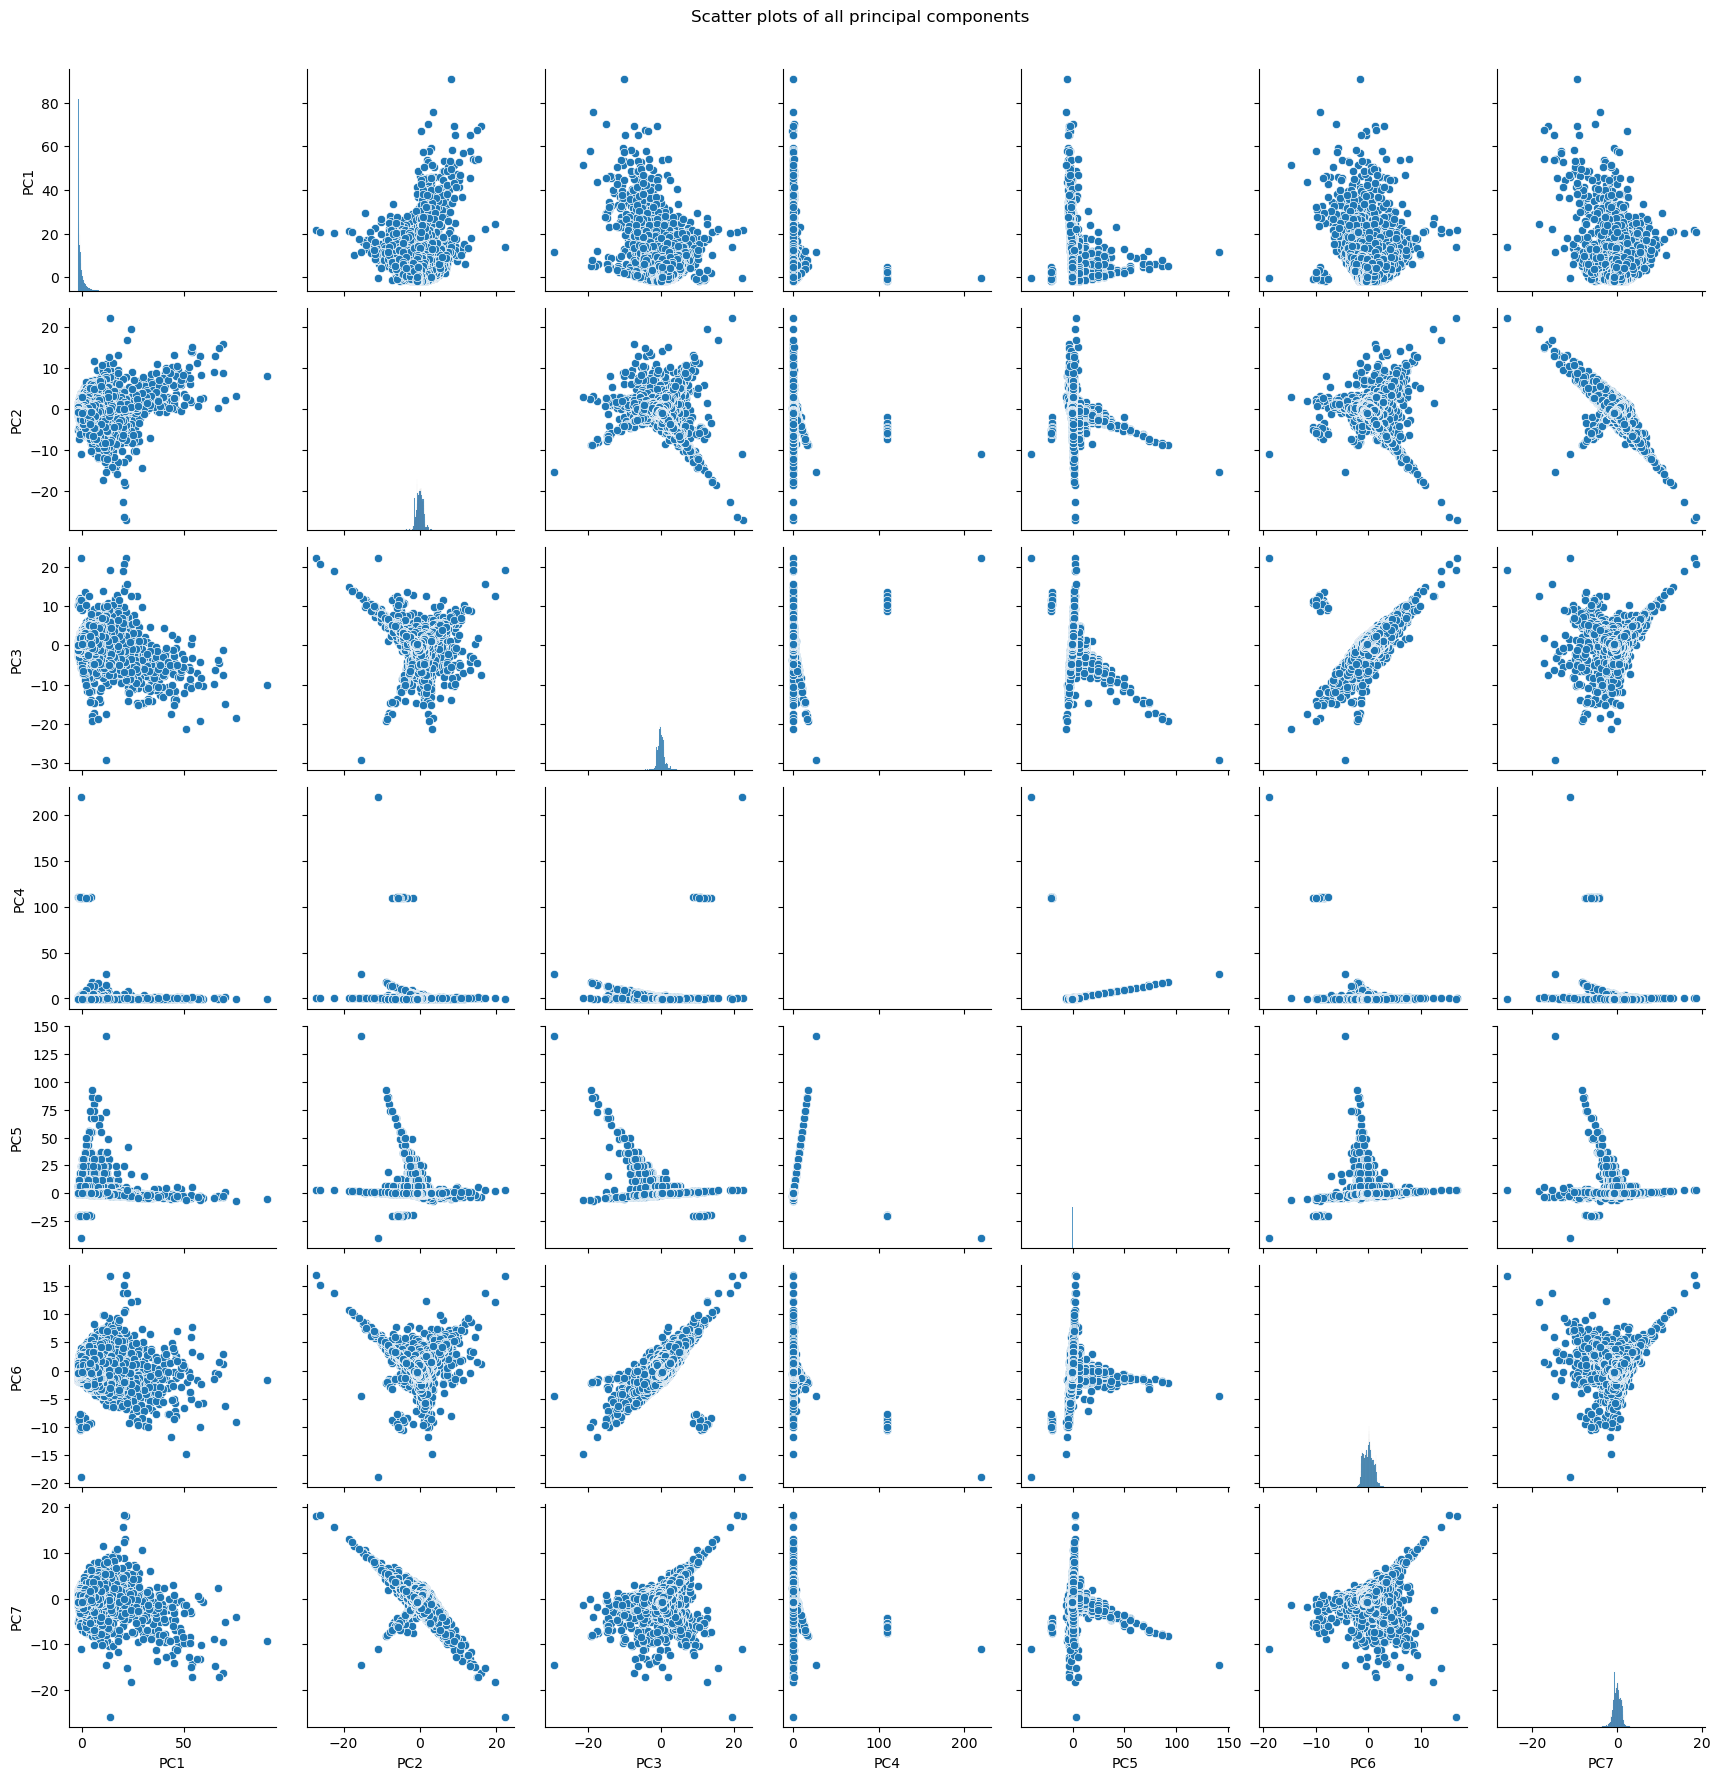

In [15]:
sns.pairplot(pca_df)
plt.suptitle('Scatter plots of all principal components', y=1.02)
plt.show()

PC1: numVisits, numProcedures, numContacts, cumulativeVisitDuration, numPlanned, numRegularOutpatient - in general PC1 describes number of visits 

PC4: numAcuteAmbulatory

PC5: numHomeAppointments


PC1 vs PC5:

Visible some tendency in patients who have fewer visits, but many of them are home visits (Older/disabled people?)

In [16]:
df.columns

Index(['patientID', 'numVisits', 'numProcedures', 'numContacts',
       'cumulativeVisitDuration', 'Age', 'Gender', 'Diagnosis', 'Diagnosis.1',
       'PhysicalAppointments', 'HomeAppointments', 'VirtualAppointments',
       'numAcute', 'numPlanned', 'numRegularOutpatient', 'numAcuteAmbulatory',
       'numUnderObservation'],
      dtype='object')

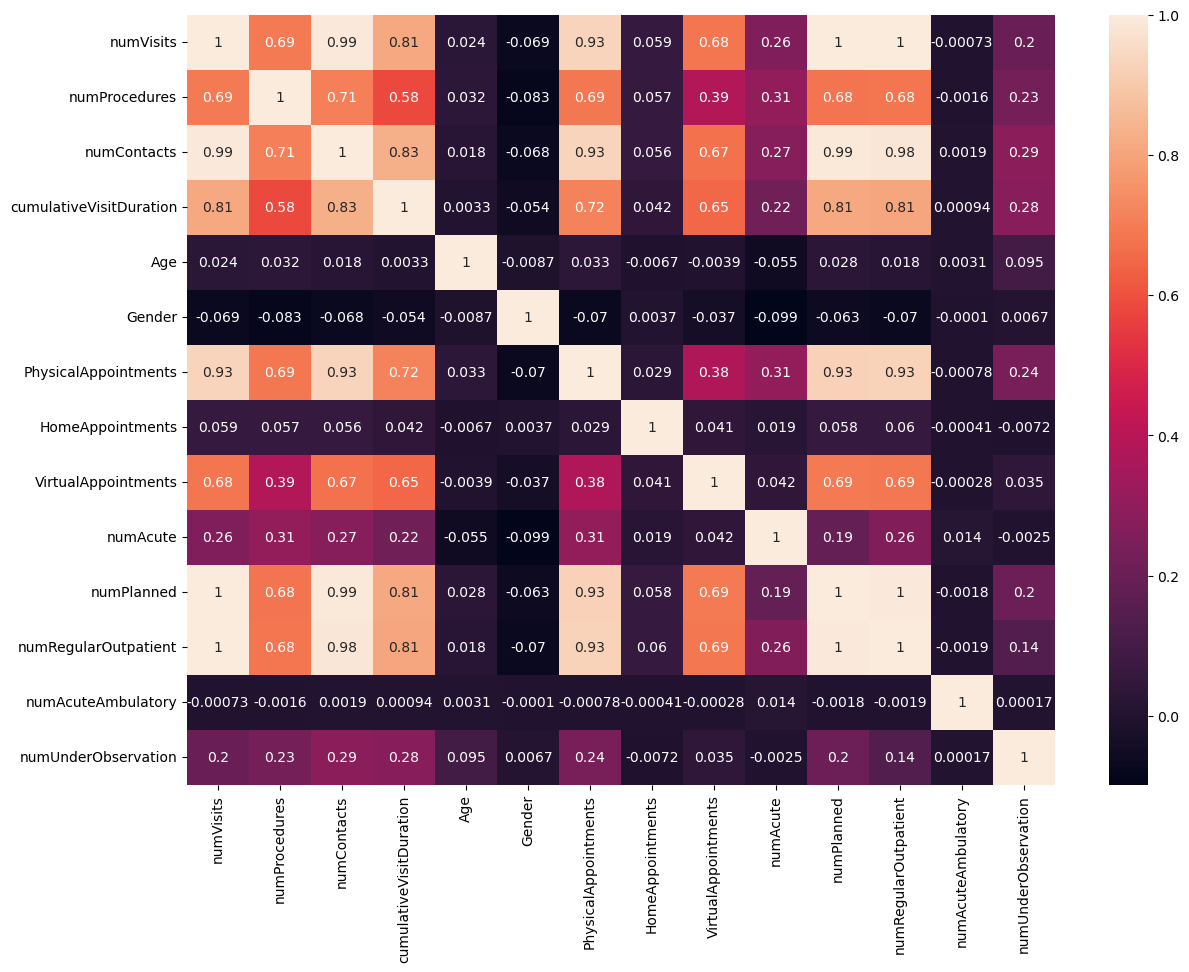

In [17]:
# correlation matrix
correlation_matrix = df_drop.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [18]:
# sparse pca
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

df_sparse = df.drop(['patientID', 'Diagnosis', 'Diagnosis.1', 'numContacts', 'numProcedures', 'numPlanned', 'numRegularOutpatient', 'Age', 'Gender'], axis=1)
numeric_cols = df_sparse.select_dtypes(include=[np.number]).columns
X = df_sparse[numeric_cols].dropna().values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sparse_pca = SparsePCA(n_components=5, alpha=1.0, ridge_alpha=0.01, max_iter=1000, random_state=42)
sparse_pca.fit(X_scaled)
X_sparse_pca = sparse_pca.transform(X_scaled)

print("Sparse PCA components (loadings):")
print(sparse_pca.components_)



Sparse PCA components (loadings):
[[ 0.53831418  0.5006747   0.42370456  0.          0.52916645  0.
   0.          0.        ]
 [ 0.00787154 -0.         -0.01179886  0.99989941 -0.         -0.
  -0.         -0.        ]
 [ 0.04866432  0.          0.18598672  0.         -0.25008589  0.703648
   0.63669244  0.        ]
 [-0.03929867  0.         -0.14153073  0.          0.18387698 -0.4866469
   0.8413018   0.        ]
 [ 0.          0.07354097  0.15022047  0.         -0.30588804  0.
   0.          0.93726093]]


In [19]:
df_sparse.columns

Index(['numVisits', 'cumulativeVisitDuration', 'PhysicalAppointments',
       'HomeAppointments', 'VirtualAppointments', 'numAcute',
       'numAcuteAmbulatory', 'numUnderObservation'],
      dtype='object')

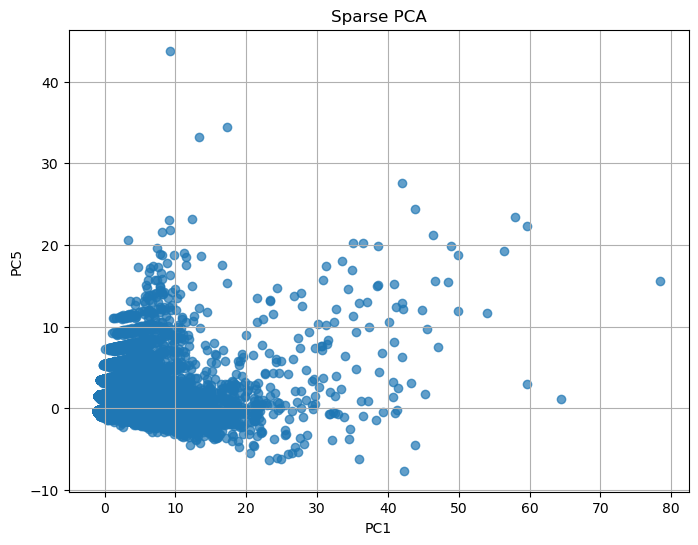

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(X_sparse_pca[:, 0], X_sparse_pca[:, 4], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.title('Sparse PCA')
plt.grid(True)
plt.show()

A few clusters could be extracted:
- Fewer vists, but many of them are UnderObservation
- More visits, but few of them are UnderObservation/ many are Virtual Appointments
- A sparse cluster of patients who have many visits ratio between UnderObservation - Virtual Appointments vary a lot



For higher numbers of visits it can be observed that spikes and dips in both distributions are aligned. It can mean that patients who have many appointments of the type Under Observation, tend to have them as Virtual Appointments.

In [58]:
df_mod = df.copy()
avg_virtual = df_mod.groupby('numVisits')['VirtualAppointments'].mean().reset_index()
avg_under_obs = df_mod.groupby('numVisits')['numUnderObservation'].mean().reset_index()
avg_under_obs = avg_under_obs[avg_under_obs['numVisits'] > 100]
avg_virtual = avg_virtual[avg_virtual['numVisits'] > 100]

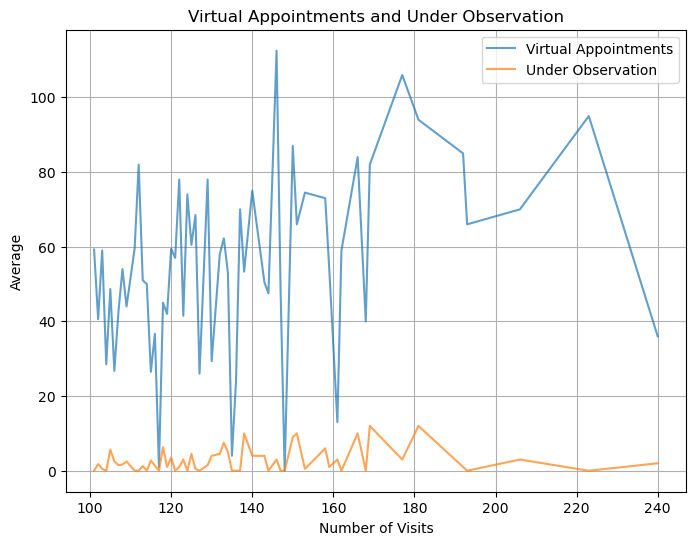

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(avg_virtual['numVisits'] ,avg_virtual['VirtualAppointments'], alpha=0.7)
plt.plot(avg_virtual['numVisits'], avg_under_obs['numUnderObservation'], alpha=0.7)
plt.legend(['Virtual Appointments', 'Under Observation'])
plt.title('Virtual Appointments and Under Observation')
plt.ylabel('Average')
plt.xlabel('Number of Visits')
plt.grid(True)
plt.show()

In [62]:
all_virtual = df_mod['VirtualAppointments'].sum()
all_under_obs = df_mod['numUnderObservation'].sum()
print(f'Total Virtual Appointments: {all_virtual}')
print(f'Total Under Observation: {all_under_obs}')

Total Virtual Appointments: 393587
Total Under Observation: 51832


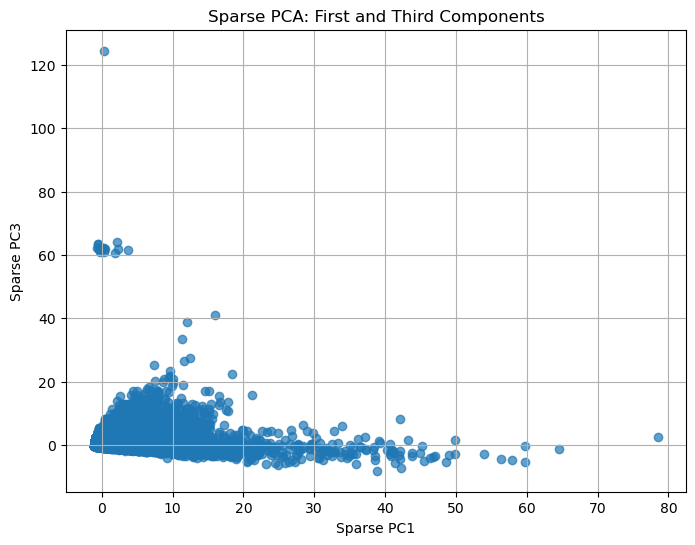

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_sparse_pca[:, 0], X_sparse_pca[:, 2], alpha=0.7)
plt.xlabel('Sparse PC1')
plt.ylabel('Sparse PC3')
plt.title('Sparse PCA: First and Third Components')
plt.grid(True)
plt.show()

There is a major group of patients who in total have up to 15 visits and they tend to have more acute appointments, than those who have more visits in total.

In [64]:
df_all = pd.read_csv('data/Case Rigshospitalet.csv')

C:\Users\Zosia\AppData\Local\Temp\ipykernel_1316\380429822.py:1: DtypeWarning: Columns (9,13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/Case Rigshospitalet.csv')


In [65]:
df_all.columns

Index(['Patient ID', 'Patientkontakt ID',
       'Patient alder på kontaktstart tidspunkt', 'Kontakt startdato',
       'Kontakt slutdato', 'Kontakttype', 'Indlæggelsesmåde',
       'Patientkontakttype', 'Aktionsdiagnosekode', 'Bidiagnosekode',
       'Behandlingsansvarlig Afdeling', 'Kontakt varighed (timer)',
       'Procedure-kode', 'Procedure-tillægskoder', 'Procedure udført',
       'Behandlingskontakt ID', 'Besøgstype', 'Patient køn',
       'Patient civilstand', 'Patient oprettet på Min SP (J/N)',
       'Patient land', 'Patient region', 'Patient postnummer',
       'Patient kommune'],
      dtype='object')

In [74]:
df_all['Patientkontakttype'].unique()

array(['2 Ambulant', '4 Ambulant Us/Op', '3 Akut Ambulant'], dtype=object)

In [75]:
df_filtered = df_all[(df_all['Kontakttype'] == 'Virtuel pt.kt.') & (df_all['Patientkontakttype'] == '4 Ambulant Us/Op')]
df_filtered.head()

,Patient ID,Patientkontakt ID,Patient alder på kontaktstart tidspunkt,Kontakt startdato,Kontakt slutdato,Kontakttype,Indlæggelsesmåde,Patientkontakttype,Aktionsdiagnosekode,Bidiagnosekode,...,Procedure udført,Behandlingskontakt ID,Besøgstype,Patient køn,Patient civilstand,Patient oprettet på Min SP (J/N),Patient land,Patient region,Patient postnummer,Patient kommune
22935,Z3620491,1301025507893,3,"2023-06-28 12:08:00,000","2023-06-28 13:08:00,000",Virtuel pt.kt.,Planlagt,4 Ambulant Us/Op,DH500A,NaN,...,"2023-06-28 12:08:00,000",189.423.806,TELEFONKONSULTATION (AMBULANT AFTALE)*,Kvinde,Ugift,J,Danmark,Hovedstaden (84),2450,København
22936,Z3622247,1301025036223,3,"2023-05-24 08:18:00,000","2023-05-24 09:18:00,000",Virtuel pt.kt.,Planlagt,4 Ambulant Us/Op,DH492,NaN,...,"2023-05-24 08:18:00,000",186.999.898,TELEFONKONSULTATION (AMBULANT AFTALE)*,Mand,Ugift,J,Danmark,Hovedstaden (84),1663,København
22938,Z3644028,1301027070407,3,"2023-11-03 08:19:00,000","2023-11-03 09:19:00,000",Virtuel pt.kt.,Planlagt,4 Ambulant Us/Op,DH001,NaN,...,"2023-11-03 08:19:00,000",197.504.888,TELEFONKONSULTATION (AMBULANT AFTALE)*,Kvinde,Ugift,J,Danmark,Hovedstaden (84),2450,København
22939,Z3689042,1301023994637,2,"2023-04-03 10:35:00,000","2023-04-03 11:35:00,000",Virtuel pt.kt.,Planlagt,4 Ambulant Us/Op,DQ105,NaN,...,"2023-04-03 10:35:00,000",181.554.738,TELEFONKONSULTATION (AMBULANT AFTALE)*,Mand,Ugift,J,Danmark,Hovedstaden (84),1416,København
22941,Z3695469,1301030464840,3,"2024-08-16 12:33:00,000","2024-08-16 13:33:00,000",Virtuel pt.kt.,Planlagt,4 Ambulant Us/Op,DH500,NaN,...,"2024-08-16 12:33:00,000",220.370.535,TELEFONKONSULTATION (AMBULANT AFTALE)*,Mand,Ugift,J,Danmark,Hovedstaden (84),2720,København


Only five observations that are the same time Virtual Appointment and Under Observation!